# Homework 3
Noam Yan

## Problem 1

1a) Since the confusion matrix is provided. It is esay to get the accuracy. NN makes 8 mistakes and NA makes 12 mistakes, so NN makes fewer mistakes.<br>
1b) Considering the preference of accuracy of birds, we tend to use NA to maximize the recall regardless of the precision. <br>
1c) To reproduce the truth table with new input,we can assume the threshold does not change, so the ratio between correct-predicted bird and predicted bird and the ratio between correct-predicted person and predicted person should remains the same.<br>
<span style="color:red">**Unfinished!!!**</span>


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [65]:
# 
NN_tp,NN_fp,NN_fn,NN_tn = 45,5,3,47
NA_tp,NA_fp,NA_fn,NN_tn = 47,11,1,42
NN_bird_p = NN_tp/(NN_tp+NN_fp)
NN_person_p = NN_tn/(NN_tn+NN_fn)

# NA_prec = NA_tp/(NA_tp+NA_fp)
# NA_rec = NA_tn/(NA_tn+NA_fn)
NN_bird_p,NN_person_p

(0.9, 0.9333333333333333)

In [10]:
people = 100*.01
birds = 100*.99
NN_newTp = NN_rec*birds
NN_newFp = NN_newTp / NN_prec - NN_newTp
NN_newTp
NN_prec

0.9

## Problem 2
2a)

In [15]:
def _conv (xrange, sumOrAvg, pdf, times):
    '''
    sumOrAvg:  0 means sum, 1 means Avg.
    times: can be a list or an integer.
    '''
    conv_pdf = pdf
    if type(times) is int:
        for i in range(times-1):
            conv_pdf = np.convolve(conv_pdf,pdf)
        conv_xrange = np.linspace(xrange[0]*times,xrange[-1]*times, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
        return conv_xrange, conv_pdf                                                                                                               
    else:
        ans_dist = {"conv_xrange":[], "conv_pdf":[]}                                                                                                               
        for i in times:
            for j in range(i-1):
                conv_pdf = np.convolve(conv_pdf,pdf)
            conv_xrange = np.linspace(xrange[0]*i,xrange[-1]*i, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
            ans_dist['conv_xrange'].append(conv_xrange)
            ans_dist['conv_pdf'].append(conv_pdf)
        return ans_dist['conv_xrange'], ans_dist['conv_pdf']

In [16]:
xrange = np.arange(0,5,1e-2)
pdf = stats.expon.pdf(xrange)
sum_xrange, sum_pdf = _conv(xrange,0,pdf,2)

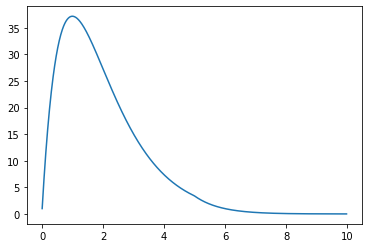

In [18]:
fig,ax = plt.subplots(1,1)
ax.plot(sum_xrange,sum_pdf)

Just like Prof.Morales showed in the second lecture, it is a Rayleigh distribution.<br> 
2b)

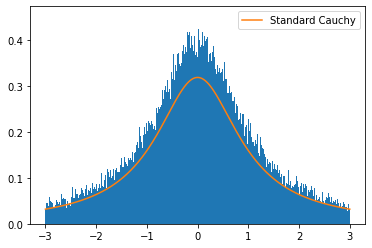

In [63]:
X_rvs = stats.norm.rvs(size=100000)
Y_rvs = stats.norm.rvs(size=100000)
xrange = np.linspace(-3,3,1000)
cauchy_pdf = stats.cauchy.pdf(xrange)
ratio = X_rvs/Y_rvs
fig,ax = plt.subplots(1,1)
ax.hist(ratio,bins=500,range=(-3,3),density=True)
ax.plot(xrange,cauchy_pdf, label="Standard Cauchy")
ax.legend()
plt.show()

This is a Standard Cauchy Distribution.<br>
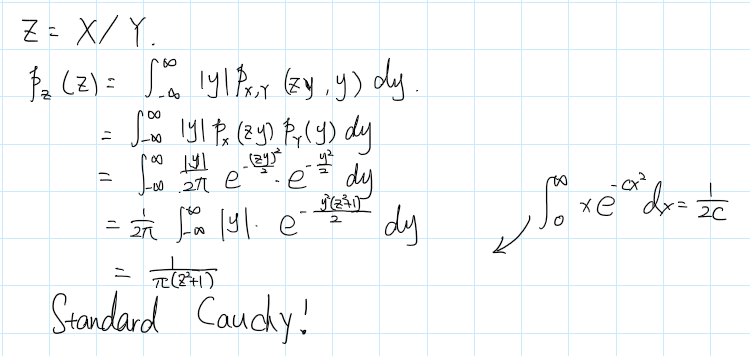
2c)

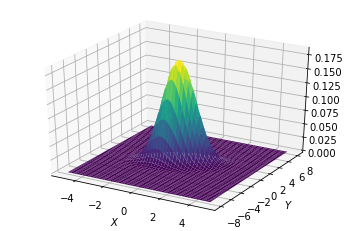

In [92]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-5, 5, 500)
Y = np.linspace(-8, 8, 500)
X, Y = np.meshgrid(X, Y)

mu = np.array([0., 0.])
Sigma = np.array([[ 1. , .5], [.5,  1.]])

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(X, Y, Z,cmap=cm.viridis)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')



plt.show()

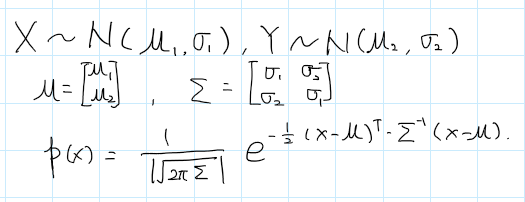